# Project: Data Wrangling of WeRateDogs Tweets

## Table of Contents
<ul>
<li><a href="#wrangling">Wrangle Report</a></li>
<li><a href="#analysis">Data Analysis Report</a></li>
</ul>


<a id='wrangling'></a>
## Wrangle Report

1. Gather: In the first step I describe my gathering efforts, incl. loading the file twitter-archive-enhanced.csv, downloading programmatically image_predictions.tsv and storing as well as assessing Twitter API to create tweet_json.txt.
2. Assess: In the secong step I will assess eight (8) quality issues and two (2) tidiness issues.
3. Clean: In the third step I clean the issues, merge the dataframes to a twitter_archive_master.csv and store it.

In [278]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import os
import tweepy
import re

### Gather

1. Read from WeRateDogs Twitter archive: twitter_archive_enhanced.csv.

In [279]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Get the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [280]:
#I have to do this only once
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#r = requests.get(url)
#r

In [281]:
# I have to do this only once
#with open (os.path.join(url.split('/')[-1]), mode ='wb') as file:
#        file.write(r.content)

In [282]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [283]:
#delete before sending
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [284]:
#try:
#    api.verify_credentials()
#    print("Authentication OK")
#except:
#    print("Error during authentication")

Extract from tweepy posts for the analysis. The posts have the folling characteristics:

In [285]:
#tweet_id_list = twitter_archive['tweet_id'].tolist()
#tweet_texts = {}
#tweet_errors = {}
#count = 0

#for tweet_id in tweet_id_list:
#    count += 1
#    try:
#        tweet = api.get_status(tweet_id, tweet_mode='extended')
#        tweet_texts[tweet_id] = tweet
#        print(count, 'success')
#    except tweepy.TweepError as error:
#        tweet_errors[tweet_id] = error
#        print (count, 'fail')

In [286]:
#tweet_texts

In [287]:
#tweet_info = pd.DataFrame.from_dict(tweet_texts, orient='index')

In [288]:
#tweet_info.head()

In [289]:
#tweet_info.to_json(r'tweet_json.txt')

In [290]:
#tweet_info.to_json('tweet_info.json')

In [291]:
#tweet_info.to_csv('tweet_info.csv', index=False)

In [292]:
tweet_info = pd.read_csv('tweet_info.csv')

### Assess

These issues were found:

- Issue 1: three dataframes instead of one and too much unnecessary data (Tidiness)
- Issue 2: tweet_info - 'id'-column instead of 'tweet_id' (Quality)
- Issue 3: missing values ('tweet_id' in image_predictions vs twitter_archive vs tweet_info) (Quality)
- Issue 4: some of the dog ratings are retweets (Quality)
- Issue 5: twitter_archive: doggo, floofer, pupper, puppo are columns instead of values (Tidiness)
- Issue 6: twitter_archive: Nulls are text and not nulls (puppo, pupper, doggo, floofer column) and many entries are "None" (Quality)
- Issue 7: image_predictions: nondescriptive column headers (p1, p2, p3) (Quality)
- Issue 8: twitter_archive: incoherent values in the rating_denominator(150, 50, 2...) (Quality)
- Issue 9: twitter_archive: rating numerator is int instead of float (Quality)
- Issue 10: twitter_archive: rating numerator is not extracted correcty, e.g. 5 instead of 13.5 in row 46 (Quality)
- Issue 11: twitter_archive: denominator and numerator are in two columns instead of one (Tidiness)
- Issue 12: image_predictions: dog breeds aresometimes lowercase (Quality)
- Issue 13: twitter_archive: dog names are extracted not correctly (Quality)

In [293]:
pd.set_option('display.max_colwidth', -1)

In [294]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [295]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [296]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [297]:
twitter_archive['doggo'].value_counts(), 

(None     2259
 doggo    97  
 Name: doggo, dtype: int64,)

In [298]:
twitter_archive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [299]:
twitter_archive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [300]:
twitter_archive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [301]:
df_show = twitter_archive[twitter_archive['rating_denominator'] == 150]
df_show

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [302]:
twitter_archive['retweeted_status_id'].unique()

array([             nan,   8.87473957e+17,   8.86053734e+17,
         8.30583321e+17,   8.78057613e+17,   8.78281511e+17,
         6.69000397e+17,   8.76850772e+17,   8.66334965e+17,
         8.68880398e+17,   8.73213776e+17,   8.72657584e+17,
         8.41077006e+17,   8.59196979e+17,   8.68552279e+17,
         8.65013420e+17,   8.66450706e+17,   8.37820168e+17,
         8.63062472e+17,   8.06629075e+17,   8.60563773e+17,
         8.60914485e+17,   7.61672994e+17,   8.39549326e+17,
         8.57061112e+17,   8.44704788e+17,   8.56330159e+17,
         8.42163533e+17,   8.55122533e+17,   8.31650052e+17,
         8.29374342e+17,   8.48289382e+17,   8.33124695e+17,
         8.32369877e+17,   8.47971000e+17,   7.56288534e+17,
         7.73308824e+17,   8.07106841e+17,   8.17423860e+17,
         8.40632337e+17,   6.67152164e+17,   8.39289919e+17,
         8.38905981e+17,   7.83839966e+17,   8.20749717e+17,
         8.37011345e+17,   8.36648149e+17,   8.17827839e+17,
         7.86963064e+17,

In [303]:
retweet_ids = twitter_archive[twitter_archive['retweeted_status_id']> 0]
retweet_ids

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [304]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [305]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [306]:
tweet_info

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}","{'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mOb2m0UI', 'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mOb2m0UI', 'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url'

In [307]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null int64
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null float64
coordinates                      0 non-nu

### Clean
First of al: make a copy of all dataframes

In [308]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_info_copy = tweet_info.copy()

#### Issue 1 - 3  : Define
- merge three dataframes to one dataframe with the following columns: tweet_id, timestamp, text, namerating_numenator, rating_denominator, name, retweet_count, favourite_count, picture url and the image_predictions table except for the columns img_num
- first extract the necessary columns by using iloc or drop function
- rename the column 'id' to 'tweet_id' to enable merger
- use merge function with inner join to merge on tweet_ids that are in all dataframes and drop ids that are not existent in all dataframes

#### Issue 1 - 3 : Code

In [309]:
#choose the columns outlined above for the merger 
df_clean = twitter_archive.iloc[:,[0,3,5,10,11,12]]
to_merge1 = tweet_info.iloc[:,[1,20,21]]
to_merge2 = image_predictions.drop(columns='img_num')

In [310]:
#rename the id column to tweet_id
to_merge1 = to_merge1.rename(columns={'id':'tweet_id'})

In [311]:
#merge
df_clean2 = pd.merge(df_clean, to_merge1, how='inner', on='tweet_id')
df_clean3 = pd.merge(df_clean2, to_merge2, how='inner', on='tweet_id')

####  Issue 1 - 3 : Test

In [312]:
df_clean3.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,7723,36278,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5712,31282,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3786,23552,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7878,39566,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,8498,37793,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [313]:
df_clean = df_clean3.copy()

In [314]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 18 columns):
tweet_id              2059 non-null int64
timestamp             2059 non-null object
text                  2059 non-null object
rating_numerator      2059 non-null int64
rating_denominator    2059 non-null int64
name                  2059 non-null object
retweet_count         2059 non-null int64
favorite_count        2059 non-null int64
jpg_url               2059 non-null object
p1                    2059 non-null object
p1_conf               2059 non-null float64
p1_dog                2059 non-null bool
p2                    2059 non-null object
p2_conf               2059 non-null float64
p2_dog                2059 non-null bool
p3                    2059 non-null object
p3_conf               2059 non-null float64
p3_dog                2059 non-null bool
dtypes: bool(3), float64(3), int64(5), object(7)
memory usage: 263.4+ KB


#### Issue 4  : Define
- remore retweets from cleaned master dataframe by dropping of tweets that have an retweet id

#### Issue 4  : Code

In [315]:
df_clean4 = df_clean[~df_clean.tweet_id.isin(retweet_ids.tweet_id)]
df_clean4

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,7723,36278,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5712,31282,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3786,23552,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7878,39566,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,8498,37793,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,2847,19040,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,1854,11083,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,17233,61132,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,3921,26196,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,6710,29926,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Issue 4  : Test

In [316]:
test = df_clean4[df_clean4.tweet_id.isin(retweet_ids.tweet_id)]
test

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [317]:
df_clean = df_clean4

#### Issue 5 + 6 : Define
- query the dog age columns to find out if only one dog stage is given per dog
- create a column 'dog_age'
- Set the None values to np.nan in all the 4 dog stage columns
- drop the columns where for all four stages are NA values
- use df.agg() function to melt four columns (puppo, pupper, doggo, floofer) into column 'dog_age'
- replace the NA values with '' in the dog_age column by using apply() and replace()
- merge the column 'dog_age' into master dataframe with left join on the tweet_id indicator

#### Issue 5 + 6: Code

In [318]:
more_than1 = twitter_archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]
more_than1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [319]:
dogs = twitter_archive[['tweet_id','puppo','pupper','floofer','doggo']].copy()

In [320]:
#replace the values by nans for the next step of joining
dogs['puppo'] = dogs['puppo'].apply(lambda x: np.nan if x == "None" else x)
dogs['pupper'] = dogs['pupper'].apply(lambda x: np.nan if x == "None" else x)
dogs['floofer'] = dogs['floofer'].apply(lambda x: np.nan if x == "None" else x)
dogs['doggo'] = dogs['doggo'].apply(lambda x: np.nan if x == "None" else x)

In [321]:
dogs2 = dogs.dropna(axis=0, thresh=2)

In [322]:
dogs2 = dogs2.copy()

In [323]:
#join the values from the four columns to a dog_age column
dogs2['dog_age'] = dogs2[['puppo', 'pupper', 'floofer', 'doggo']].astype(str).agg(','.join , axis=1)

In [324]:
dogs2.head()

,tweet_id,puppo,pupper,floofer,doggo,dog_age
9,890240255349198849,NaN,NaN,NaN,doggo,"nan,nan,nan,doggo"
12,889665388333682689,puppo,NaN,NaN,NaN,"puppo,nan,nan,nan"
14,889531135344209921,puppo,NaN,NaN,NaN,"puppo,nan,nan,nan"
29,886366144734445568,NaN,pupper,NaN,NaN,"nan,pupper,nan,nan"
43,884162670584377345,NaN,NaN,NaN,doggo,"nan,nan,nan,doggo"


In [325]:
dogs2.dog_age.value_counts()

nan,pupper,nan,nan       245
nan,nan,nan,doggo        83 
puppo,nan,nan,nan        29 
nan,pupper,nan,doggo     12 
nan,nan,floofer,nan      9  
puppo,nan,nan,doggo      1  
nan,nan,floofer,doggo    1  
Name: dog_age, dtype: int64

In [326]:
#remove first batch of nans
dogs2['dog_age'] = dogs2['dog_age'].apply(lambda x: x.replace('nan,', ''))

In [327]:
dogs2.dog_age.value_counts()

pupper,nan       245
doggo            83 
puppo,nan        29 
pupper,doggo     12 
floofer,nan      9  
floofer,doggo    1  
puppo,doggo      1  
Name: dog_age, dtype: int64

In [328]:
#remove even more nans
dogs2['dog_age'] = dogs2['dog_age'].apply(lambda x: x.replace(',nan', ''))

In [329]:
dogs2.dog_age.value_counts()

pupper           245
doggo            83 
puppo            29 
pupper,doggo     12 
floofer          9  
floofer,doggo    1  
puppo,doggo      1  
Name: dog_age, dtype: int64

In [330]:
#drop all columns except for tweet_id and dog_age for the merger
dogs3 = dogs2[['tweet_id','dog_age']]

In [331]:
dogs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 9 to 2017
Data columns (total 2 columns):
tweet_id    380 non-null int64
dog_age     380 non-null object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [332]:
#merge the dog_age column on the master df
df_clean4 = pd.merge(df_clean, dogs3, how='left', on='tweet_id')

####  Issue 5 + 6 : Test

In [333]:
df_clean4.dog_age.value_counts()

pupper           203
doggo            62 
puppo            22 
pupper,doggo     9  
floofer          7  
floofer,doggo    1  
puppo,doggo      1  
Name: dog_age, dtype: int64

In [334]:
df_clean4

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_age
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,7723,36278,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5712,31282,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3786,23552,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7878,39566,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,8498,37793,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,2847,19040,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,1854,11083,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,17233,61132,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,3921,26196,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,6710,29926,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


In [335]:
df_clean = df_clean4

####  Issue 7 : Define
- rename nondescriptive column headers p1,p2,p3 and use breed instead of p

#### Issue 7 : Code

In [336]:
df_clean = df_clean.rename(columns={'p1':'breed1','p2':'breed2','p3':'breed3',
                                   'p1_conf':'breed1_conf','p2_conf':'breed2_conf','p3_conf':'breed3_conf',
                                   'p1_dog':'breed1_dog','p2_dog':'breed2_dog','p3_dog':'breed3_dog'})

#### Issue 7 : Test

In [337]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
text                  1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
jpg_url               1987 non-null object
breed1                1987 non-null object
breed1_conf           1987 non-null float64
breed1_dog            1987 non-null bool
breed2                1987 non-null object
breed2_conf           1987 non-null float64
breed2_dog            1987 non-null bool
breed3                1987 non-null object
breed3_conf           1987 non-null float64
breed3_dog            1987 non-null bool
dog_age               305 non-null object
dtypes: bool(3), float64(3), int64(5), object(8)
memory usage: 269.7+ KB


#### Issue 8 - 11 : Define
- check for ratings that were extracted incorrectly using regex
- extract rating numerator correcty as float
- create one column 'rating' with rating numerator and denominator as float (numerator divided by denominator)

#### Issue 8 - 11: Code

In [338]:
see_rating = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
see_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
548,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1368,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


Because we have only four values that are extracted not correctly, I will change them by hand.

In [339]:
df_clean.iloc[39, 3] = 13.5
df_clean.iloc[499, 3] =  9.75
df_clean.iloc[548, 3] = 11.27
df_clean.iloc[1368, 3] =  11.26

In [340]:
# create new column with float rating
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [341]:
# drop columns that are not needed anymore
df_clean5 = df_clean.drop(columns=['rating_numerator','rating_denominator'])

#### Issue 8 - 11 : Test

In [342]:
df_clean[df_clean['rating_numerator'] == 13.5]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
39,883482846933004288,2017-07-08 00:28:19 +0000,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10,Bella,9031,43053,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN,1.35


In [343]:
df_clean[df_clean['rating_numerator'] == 9.75]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
499,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,6251,18622,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN,0.975


In [344]:
df_clean[df_clean['rating_numerator'] == 11.27]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
548,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10,Sophie,1643,6655,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True,pupper,1.127


In [345]:
df_clean[df_clean['rating_numerator'] == 11.26]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
1368,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10,None,482,1711,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,NaN,1.126


In [346]:
df_clean5.head()

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,7723,36278,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,5712,31282,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,3786,23552,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,7878,39566,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,8498,37793,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,1.2


In [347]:
df_clean5.rating.value_counts()

1.200000      452
1.000000      420
1.100000      402
1.300000      257
0.900000      151
0.800000      95 
0.700000      51 
1.400000      35 
0.500000      33 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      4  
0.000000      2  
1.127000      1  
1.350000      1  
3.428571      1  
0.636364      1  
0.818182      1  
1.126000      1  
0.975000      1  
42.000000     1  
177.600000    1  
Name: rating, dtype: int64

In [348]:
# just one check to see the outliers
outliers = df_clean5[df_clean5['rating'] >= 3]
outliers

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
381,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,Sam,1469,5452,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,3.428571
720,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,2477,5144,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,177.600000
1711,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,None,8344,23798,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN,42.000000


In [349]:
df_clean = df_clean5

#### Issue 12 : Define
- Capitalize letters in entries in the breed columns

#### Issue 12 : Code

In [350]:
df_clean['breed1'] = df_clean['breed1'].apply(lambda x: x.capitalize())
df_clean['breed2'] = df_clean['breed2'].apply(lambda x: x.capitalize())
df_clean['breed3'] = df_clean['breed3'].apply(lambda x: x.capitalize())

#### Issue 12 : Test

In [351]:
df_clean['breed1'].value_counts()

Golden_retriever             139
Labrador_retriever           93 
Pembroke                     88 
Chihuahua                    79 
Pug                          54 
Chow                         41 
Samoyed                      39 
Pomeranian                   38 
Toy_poodle                   37 
Malamute                     29 
Cocker_spaniel               27 
French_bulldog               25 
Chesapeake_bay_retriever     23 
Miniature_pinscher           22 
Seat_belt                    21 
German_shepherd              20 
Siberian_husky               20 
Staffordshire_bullterrier    18 
Teddy                        18 
Eskimo_dog                   18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Beagle                       17 
Shih-tzu                     17 
Rottweiler                   17 
Cardigan                     17 
Kuvasz                       16 
Italian_greyhound            16 
Lakeland_terrier             16 
Web_site                     15 
          

#### Issue 13 : Define
- search for names that are None
- search for names that are lowercase (exctracted incorrecty) using regex
- extract everything that is followed by "named" and "name is" to get correct names 
- set all other issues to "None"

#### Issue 13: Code

In [352]:
none_names = df_clean[df_clean['name'] == 'None']
none_names

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,2847,19040,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,17233,61132,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN,1.3
12,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None,9150,45129,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True,puppo,1.3
23,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None,9563,31619,https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg,Mexican_hairless,0.330741,True,Sea_lion,0.275645,False,Weimaraner,0.134203,True,NaN,1.3
24,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None,5449,28771,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,NaN,1.2
32,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None,3997,20571,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,Malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,NaN,1.3
36,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None,5209,25453,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,NaN,1.4
41,883117836046086144,2017-07-07 00:17:54 +0000,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",None,6070,34848,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,Golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,Kuvasz,0.002471,True,NaN,1.3
52,880872448815771648,2017-06-30 19:35:32 +0000,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,None,3506,20013,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True,NaN,1.2
55,880095782870896641,2017-06-28 16:09:20 +0000,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,None,3974,25969,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,Miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,Beagle,0.106073,True,NaN,1.1


After checking the tweets without names visually, I decided to keep them. Sampling through them, I have found a lot of valid photos of dogs, as well as ratings. The names here weren't extracted, because the text does not mention any name. Now let's search for the lowercase letters.

In [353]:
# extract the rows that need to be adjusted by searching for lowercase names
see_lower = df_clean[df_clean.name.str.contains(r"^[a-z]+")]
see_lower = see_lower.copy()

In [354]:
# exctract everything that is followed by "name" or "name is"
see_lower['name'] = see_lower.text.str.extract('((named [A-Z][a-z]+)|(name is [A-Z][a-z]+))')

In [355]:
see_lower.name.value_counts()

named Spork        1
named Berta        1
named Rufus        1
named Alphred      1
named Wylie        1
named Hemry        1
named Chuk         1
named Alfonso      1
named Johm         1
named Kip          1
name is Zoey       1
named Jessiga      1
named Pepe         1
named Leroi        1
named Jacob        1
named Alfredo      1
named Cheryl       1
named Cherokee     1
name is Daryl      1
named Kohl         1
named Octaviath    1
named Klint        1
Name: name, dtype: int64

In [356]:
see_lower.name = see_lower.name.astype(str)
see_lower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 21 to 1985
Data columns (total 18 columns):
tweet_id          98 non-null int64
timestamp         98 non-null object
text              98 non-null object
name              98 non-null object
retweet_count     98 non-null int64
favorite_count    98 non-null int64
jpg_url           98 non-null object
breed1            98 non-null object
breed1_conf       98 non-null float64
breed1_dog        98 non-null bool
breed2            98 non-null object
breed2_conf       98 non-null float64
breed2_dog        98 non-null bool
breed3            98 non-null object
breed3_conf       98 non-null float64
breed3_dog        98 non-null bool
dog_age           12 non-null object
rating            98 non-null float64
dtypes: bool(3), float64(4), int64(3), object(8)
memory usage: 12.5+ KB


In [357]:
#remove the unnecessary "name" and "name is" and convert nans to "None"
see_lower['name'] = see_lower['name'].apply(lambda x: x.replace('named ', ''))

In [358]:
see_lower['name'] = see_lower['name'].apply(lambda x: x.replace('name is ', ''))

In [359]:
see_lower['name'] = see_lower['name'].apply(lambda x: x.replace('nan', 'None'))

In [360]:
#drop the rows that need to be changed
df_clean6 = df_clean[~df_clean.tweet_id.isin(see_lower.tweet_id)]

In [361]:
# concat both frames
df_clean7 = pd.concat([df_clean6, see_lower])

#### Issue 13: Test

In [362]:
# check if all everything was replaced correctly
see_lower.name.value_counts()

None         76
Alfredo      1 
Jessiga      1 
Spork        1 
Jacob        1 
Klint        1 
Berta        1 
Alphred      1 
Kohl         1 
Hemry        1 
Wylie        1 
Cherokee     1 
Octaviath    1 
Cheryl       1 
Kip          1 
Pepe         1 
Daryl        1 
Zoey         1 
Leroi        1 
Chuk         1 
Alfonso      1 
Johm         1 
Rufus        1 
Name: name, dtype: int64

In [363]:
see_lower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 21 to 1985
Data columns (total 18 columns):
tweet_id          98 non-null int64
timestamp         98 non-null object
text              98 non-null object
name              98 non-null object
retweet_count     98 non-null int64
favorite_count    98 non-null int64
jpg_url           98 non-null object
breed1            98 non-null object
breed1_conf       98 non-null float64
breed1_dog        98 non-null bool
breed2            98 non-null object
breed2_conf       98 non-null float64
breed2_dog        98 non-null bool
breed3            98 non-null object
breed3_conf       98 non-null float64
breed3_dog        98 non-null bool
dog_age           12 non-null object
rating            98 non-null float64
dtypes: bool(3), float64(4), int64(3), object(8)
memory usage: 12.5+ KB


In [364]:
df_clean7

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,7723,36278,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,7.611000e-02,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,5712,31282,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,6.895690e-02,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,3786,23552,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,3.137890e-02,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,7878,39566,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,4.083590e-02,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,8498,37793,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,1.752190e-01,True,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,2847,19040,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,7.690220e-02,False,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,1854,11083,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,1.935480e-01,False,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,17233,61132,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,7.650690e-02,True,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,3921,26196,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,1.181840e-01,True,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,6710,29926,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,2.924820e-02,True,doggo,1.4


In [365]:
# search for a sample name in both dataframes
search_Jacob = see_lower[see_lower['name'] == 'Jacob']
search_Jacob

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
1672,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob,228,726,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,Toy_poodle,0.419427,True,Miniature_poodle,0.237067,True,Swing,0.104193,False,NaN,1.1


In [366]:
search_Jacob2 = df_clean7[df_clean7['name'] == 'Jacob']
search_Jacob2

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
1672,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob,228,726,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,Toy_poodle,0.419427,True,Miniature_poodle,0.237067,True,Swing,0.104193,False,NaN,1.1


In [367]:
df_clean = df_clean7

#### Save to file

In [368]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Data Analysis Report

I have done some random anaylsis, my findings are described in the act_report.  

In [369]:
from IPython.display import Image
from IPython.core.display import HTML
def path_to_image_html(path):
    return '<img src="'+ path + '" style=max-height:200px;"/>'

In [370]:
top_favorites = df_clean.nlargest(5, 'favorite_count')
HTML(top_favorites.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
769,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,77999,156526,,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,doggo,1.3
305,822872901745569793,2017-01-21 18:26:02 +0000,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,43937,133325,,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,puppo,1.3
396,807106840509214720,2016-12-09 06:17:20 +0000,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,56863,120948,,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy_terrier,0.077008,True,NaN,1.3
107,866450705531457537,2017-05-22 00:28:40 +0000,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,33032,116640,,French_bulldog,0.905334,True,Boston_bull,0.078060,True,Pug,0.001771,True,pupper,1.3
804,739238157791694849,2016-06-04 23:31:25 +0000,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,None,57821,115636,,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,Malamute,0.080901,True,doggo,1.3


For the retriever in the pool, here is the full video: https://twitter.com/dog_rates/status/744234799360020481
and for the husky here: https://twitter.com/dog_rates/status/739238157791694849

In [371]:
top_retweets = df_clean.nlargest(5, 'retweet_count')
HTML(top_retweets.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
769,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,77999,156526,,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,doggo,1.3
804,739238157791694849,2016-06-04 23:31:25 +0000,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,None,57821,115636,,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,Malamute,0.080901,True,doggo,1.3
396,807106840509214720,2016-12-09 06:17:20 +0000,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,56863,120948,,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy_terrier,0.077008,True,NaN,1.3
305,822872901745569793,2017-01-21 18:26:02 +0000,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,43937,133325,,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,puppo,1.3
58,879415818425184262,2017-06-26 19:07:24 +0000,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,40677,99433,,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,NaN,1.3


Usually, there is high correlation between favorites and retweets, as it can be also seen in our top selection. Only Duddles  from top retweets did not get to the top favorites (vid here:https://twitter.com/dog_rates/status/879415818425184262). For the correlation, here is the plot.

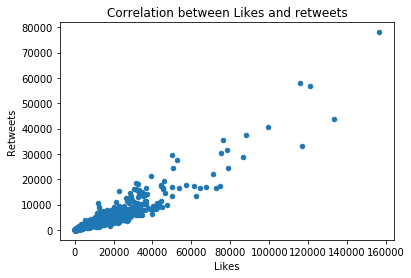

In [372]:
fig = df_clean.plot(x='favorite_count', y='retweet_count', kind='scatter')
fig.set_title('Correlation between Likes and retweets')
fig.set_xlabel('Likes')
fig.set_ylabel('Retweets')
fig

In [373]:
top_ratings = df_clean.nlargest(5, 'rating')
HTML(top_ratings.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
720,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,2477,5144,,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,NaN,177.600000
1711,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,None,8344,23798,,Microphone,0.096063,False,Accordion,0.094075,False,Drumstick,0.061113,False,NaN,42.000000
381,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,Sam,1469,5452,,Golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,3.428571
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,6710,29926,,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,1.400000
36,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None,5209,25453,,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,NaN,1.400000


Is it really a dog? And the next one?...

In [374]:
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

In [375]:
Image(url= "https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg")

Only one dog, the dog retriever, recognized in this top selection (not considering Snoop Dog), let's have a look at how accurately the AI recognized the dog photos.

Text(0.5,1,'Is it a dog?')

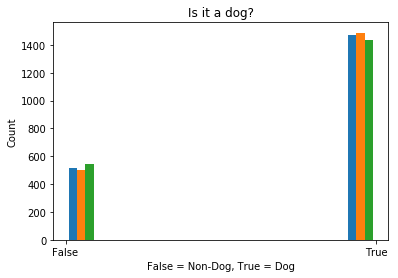

In [376]:
histogram = df_clean[['breed1_dog', 'breed2_dog', 'breed3_dog']]
plt.hist(histogram)
plt.ylabel('Count')
plt.xlabel('False = Non-Dog, True = Dog')
plt.title('Is it a dog?')

Let's have look at which dogs the AI recognized the dogs best.

In [377]:
dog_df = df_clean[df_clean['breed1_dog'] == True]
nodog_df = df_clean[df_clean['breed1_dog'] == False]

In [378]:
top_dogs = dog_df.groupby(by='breed1').mean()
top_dogs.sort_values(by=['breed1_conf'], ascending=False).head()

,tweet_id,retweet_count,favorite_count,breed1_conf,breed1_dog,breed2_conf,breed2_dog,breed3_conf,breed3_dog,rating
breed1,,,,,,,,,,
Komondor,7.774009e+17,1848.666667,9145.333333,0.972531,1.0,0.024267,0.333333,0.001990,0.333333,1.100000
Clumber,7.780270e+17,1643.000000,6655.000000,0.946718,1.0,0.015950,1.000000,0.006519,1.000000,1.127000
Brittany_spaniel,7.193514e+17,1323.285714,5393.714286,0.874545,1.0,0.068643,1.000000,0.015733,0.857143,1.042857
Keeshond,7.147067e+17,1513.750000,4471.750000,0.844431,1.0,0.133600,1.000000,0.009140,1.000000,1.025000
Bull_mastiff,7.541573e+17,1308.000000,5565.800000,0.815618,1.0,0.079414,1.000000,0.031889,1.000000,1.040000


In [379]:
komondors = df_clean[df_clean['breed1'] == 'Komondor']
HTML(komondors.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
88,871515927908634625,2017-06-04 23:56:03 +0000,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,Napolean,3222,19111,,Komondor,0.974781,True,Briard,0.020041,True,Swab,3.228240e-03,False,doggo,1.2
472,792050063153438720,2016-10-28 17:07:05 +0000,This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,Remus,1850,7318,,Komondor,0.942856,True,Swab,0.052715,False,Tibetan_terrier,2.743000e-03,True,NaN,1.1
1839,668636665813057536,2015-11-23 03:46:18 +0000,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,Berta,474,1007,,Komondor,0.999956,True,Llama,0.000043,False,Ram,2.160900e-07,False,NaN,1.0


In [380]:
clumber = df_clean[df_clean['breed1'] == 'Clumber']
HTML(clumber.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
548,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,Sophie,1643,6655,,Clumber,0.946718,True,Cocker_spaniel,0.01595,True,Lhasa,0.006519,True,pupper,1.127


In [381]:
b_spaniel = df_clean[df_clean['breed1'] == 'Brittany_spaniel']
HTML(b_spaniel.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
206,841077006473256960,2017-03-13 00:02:39 +0000,This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/XKJrmO4fAQ,Dawn,5290,22848,,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,Clumber,0.009557,True,NaN,1.2
911,717841801130979328,2016-04-06 22:29:56 +0000,This is Barclay. His father was a banana. 11/10 appeeling af https://t.co/ucOEfr2rjV,Barclay,602,2452,,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,Bath_towel,0.002561,False,NaN,1.1
931,714982300363173890,2016-03-30 01:07:18 +0000,This is Calbert. He forgot to clear his Google search history. 9/10 rookie mistake Calbert https://t.co/jRm5J3YCmj,Calbert,1026,3709,,Brittany_spaniel,0.944376,True,Beagle,0.025435,True,Ibizan_hound,0.009962,True,NaN,0.9
941,713761197720473600,2016-03-26 16:15:05 +0000,This is Piper. She would really like that tennis ball core. Super sneaky tongue slip. 12/10 precious af https://t.co/QP6GHi5az9,Piper,1371,4852,,Brittany_spaniel,0.797936,True,English_springer,0.044718,True,Welsh_springer_spaniel,0.037911,True,NaN,1.2
1108,698703483621523456,2016-02-14 03:01:06 +0000,This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp,Rusty,379,1447,,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,Beagle,0.012896,True,NaN,0.7
1373,680191257256136705,2015-12-25 01:00:07 +0000,Here's a sleepy Christmas pupper 11/10 https://t.co/KXg0f8GNQ9,None,498,2140,,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True,pupper,1.1
1828,668902994700836864,2015-11-23 21:24:36 +0000,Meet Lambeau. He's a Whistling Haiku from the plains of southern Guatemala. 11/10 so. damn. majestic. https://t.co/UqCvpSgMJe,Lambeau,97,308,,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True,NaN,1.1


In [382]:
top_dogs.sort_values(by=['rating'], ascending=False).head()

,tweet_id,retweet_count,favorite_count,breed1_conf,breed1_dog,breed2_conf,breed2_dog,breed3_conf,breed3_dog,rating
breed1,,,,,,,,,,
Saluki,8.315403e+17,4522.250000,22246.250000,0.523054,1.0,0.208351,1.0,0.118570,1.0,1.250000
Briard,7.700369e+17,2613.333333,8694.666667,0.618748,1.0,0.189322,1.0,0.053280,1.0,1.233333
Tibetan_mastiff,7.534455e+17,3665.750000,11100.750000,0.679344,1.0,0.141119,1.0,0.058313,1.0,1.225000
Border_terrier,7.933788e+17,2994.285714,12489.714286,0.464345,1.0,0.182590,1.0,0.079216,1.0,1.214286
Standard_schnauzer,6.757109e+17,794.000000,1851.000000,0.441427,1.0,0.248885,1.0,0.164967,1.0,1.200000


In [383]:
top_dogs.sort_values(by=['favorite_count'], ascending=False).head()

,tweet_id,retweet_count,favorite_count,breed1_conf,breed1_dog,breed2_conf,breed2_dog,breed3_conf,breed3_dog,rating
breed1,,,,,,,,,,
Saluki,8.315403e+17,4522.250000,22246.250,0.523054,1.0,0.208351,1.00,0.118570,1.000000,1.250000
French_bulldog,7.852970e+17,4294.800000,17520.720,0.777413,1.0,0.095869,0.88,0.029870,0.800000,1.124000
Afghan_hound,8.041621e+17,5231.333333,15809.000,0.433959,1.0,0.099034,1.00,0.081651,0.666667,0.966667
Black-and-tan_coonhound,7.602637e+17,3639.000000,15685.500,0.692000,1.0,0.147506,1.00,0.097786,1.000000,1.050000
Flat-coated_retriever,7.907257e+17,4040.375000,15507.375,0.664417,1.0,0.134755,1.00,0.051912,1.000000,1.087500


In [384]:
salukis = df_clean[df_clean['breed1'] == 'Saluki']
HTML(salukis.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
48,881666595344535552,2017-07-03 00:11:11 +0000,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,Gary,9767,47600,,Saluki,0.529012,True,Afghan_hound,0.250003,True,Golden_retriever,0.160739,True,NaN,1.3
67,877316821321428993,2017-06-21 00:06:44 +0000,"Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",Dante,4772,25792,,Saluki,0.509967,True,Italian_greyhound,0.090497,True,Golden_retriever,0.079406,True,NaN,1.3
341,817120970343411712,2017-01-05 21:29:55 +0000,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,None,2651,12418,,Saluki,0.568809,True,Afghan_hound,0.229352,True,Golden_retriever,0.157130,True,NaN,1.3
715,750056684286914561,2016-07-04 20:00:23 +0000,This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,Jameson,899,3175,,Saluki,0.484428,True,Borzoi,0.263550,True,Labrador_retriever,0.077004,True,NaN,1.1


In [385]:
f_bulldog = df_clean[df_clean['breed1'] == 'French_bulldog']
HTML(f_bulldog.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog,dog_age,rating
11,889880896479866881,2017-07-25 16:11:53 +0000,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,Bruno,4559,26210,,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,Muzzle,0.082981,False,NaN,1.3
13,889638837579907072,2017-07-25 00:10:02 +0000,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,Ted,4101,25406,,French_bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,NaN,1.2
19,888078434458587136,2017-07-20 16:49:33 +0000,This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX,Gerald,3164,20458,,French_bulldog,0.995026,True,Pug,0.000932,True,Bull_mastiff,0.000903,True,NaN,1.2
28,886366144734445568,2017-07-15 23:25:31 +0000,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,Roscoe,2895,19871,,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,pupper,1.2
64,878057613040115712,2017-06-23 01:10:23 +0000,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,Emmy,6232,39615,,French_bulldog,0.839097,True,Boston_bull,0.078799,True,Toy_terrier,0.015243,True,NaN,1.4
107,866450705531457537,2017-05-22 00:28:40 +0000,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,33032,116640,,French_bulldog,0.905334,True,Boston_bull,0.078060,True,Pug,0.001771,True,pupper,1.3
119,863062471531167744,2017-05-12 16:05:02 +0000,Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://t.co/MOBkQnyHib https://t.co/EsOB4rLEKt,Quinn,2293,8114,,French_bulldog,0.935804,True,Pug,0.059576,True,Boxer,0.001412,True,NaN,1.3
131,859924526012018688,2017-05-04 00:15:58 +0000,Meet Milky. She has no idea what happened. Just as pupset as you. Perhaps a sheep exploded. Even offered to help clean. 12/10 very good girl https://t.co/g8vpXFzw29,Milky,3900,18861,,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,Hog,0.100270,False,NaN,1.2
139,857989990357356544,2017-04-28 16:08:49 +0000,This is Rosie. She was just informed of the walk that's about to happen. Knows there are many a stick along the way. 12/10 such excite https://t.co/sOl7cFaP5X,Rosie,2481,15565,,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True,NaN,1.2
201,842163532590374912,2017-03-16 00:00:07 +0000,Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl,George,5762,24396,,French_bulldog,0.891227,True,Soccer_ball,0.022811,False,Bull_mastiff,0.012852,True,NaN,1.2


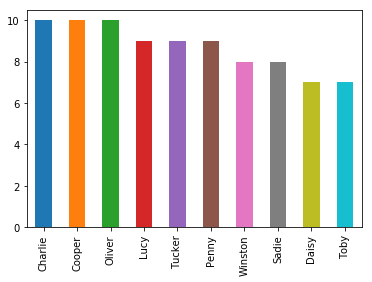

In [386]:
# plot popular names
names = df_clean[df_clean['name'] != 'None']
names_plot = names.name.value_counts()
names_plot_r = names_plot.nlargest(10)
names_plot_r.plot(kind='bar')

In [387]:
names_plot.nsmallest(20)

Davey         1
Raphael       1
Sage          1
Brandy        1
Liam          1
Karl          1
Rontu         1
Caryl         1
Jaspers       1
Jangle        1
Dallas        1
Al            1
Anthony       1
William       1
Terrenth      1
Huck          1
Maya          1
Brandonald    1
Cedrick       1
Franq         1
Name: name, dtype: int64